In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar
import math
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
searches_contacts_file = ("searches_contacts_joined.tsv")
searches_contacts = pd.read_csv(searches_contacts_file, sep='\t')

/tmp/ipykernel_40/1568986436.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_input['ts_booking_at_dt'] = search_input['ts_booking_at_dt'].astype(int)


,n_nights,n_guests_max,filter_price_max,n_messages,ts_booking_at_dt
0,2.0,2,227,3,0
1,2.0,2,326,20,1
2,1.0,3,240,11,1
15,1.0,2,105,5,0
16,1.0,2,105,5,0
...,...,...,...,...,...
28514,2.0,3,121,2,0
28515,2.0,3,121,2,0
28516,2.0,3,121,6,0
28520,3.0,1,410,6,1


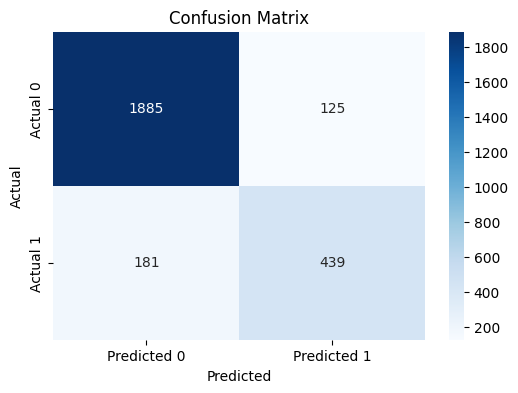


Accuracy: 0.8836501901140684
Mean Squared Error: 0.11634980988593156


In [ ]:
search_input = searches_contacts[['n_nights', 'n_guests_max', 'filter_price_max', 'n_messages', 'ts_booking_at_dt']]

for i in range(len(search_input)):
    if pd.isna(search_input.loc[i, 'ts_booking_at_dt']):
        search_input.loc[i, 'ts_booking_at_dt'] = 0
    else:
        search_input.loc[i, 'ts_booking_at_dt'] = 1

search_input['ts_booking_at_dt'] = search_input['ts_booking_at_dt'].astype(int)

search_input = search_input.dropna()
search_input['filter_price_max'] = search_input['filter_price_max'].astype(int)

inputs = search_input[['n_nights', 'n_guests_max', 'filter_price_max', 'n_messages']]
outputs = search_input['ts_booking_at_dt']

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nAccuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


In [ ]:

from sklearn.datasets import make_regression

X, y = make 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example categorical data
data = {'color': ['red', 'green', 'blue', 'green', 'red']}

df = pd.DataFrame(data)
encoder = LabelEncoder()
df['color_encoded'] = encoder.fit_transform(df['color'])
X = df[['color_encoded']]

X

,color_encoded
0,2
1,1
2,0
3,1
4,2


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6cced6a8-fe40-40d7-b88b-a3eb124108df' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>